# Color Clustering and Detection from Image

### Importing the Libraries

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

### Loading the Dataset

In [2]:
index=["color","color_name","hex","R","G","B"]
csv = pd.read_csv('colors.csv', names=index, header=None)

In [3]:
csv

,color,color_name,hex,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255
...,...,...,...,...,...,...
860,yellow_orange,Yellow Orange,#ffae42,255,174,66
861,yellow_process,Yellow (Process),#ffef00,255,239,0
862,yellow_ryb,Yellow (Ryb),#fefe33,254,254,51
863,zaffre,Zaffre,#0014a8,0,20,168


*The dataset also contains colors that have the same RGB values/hex codes. For eg : The color 'rose madder' is another name for the color 'alizarin crimson'. Thus both these colors have the same hex code and RGB values in the dataset. Therefore the dataset is to be checked for similar duplicates and only one color is to be retained for a given set of RGB values*

In [4]:
duplicate = csv[csv.duplicated(['R', 'G', 'B'], keep='first')]
duplicate.head()

,color,color_name,hex,R,G,B
96,brown_web,Brown (Web),#a52a2a,165,42,42
146,cerulean,Cerulean,#007ba7,0,123,167
157,cherry,Cherry,#de3163,222,49,99
168,cinnamon,Cinnamon,#d2691e,210,105,30
172,cocoa_brown,Cocoa Brown,#d2691e,210,105,30


*Therefore there are 100 duplicates. We thus drop all the duplicates keeping only the first occurence of the duplicates.*

In [5]:
csv = csv.drop_duplicates(
  subset = ['R', 'G','B'],
  keep = 'first').reset_index(drop = True)

In [6]:
csv

,color,color_name,hex,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255
...,...,...,...,...,...,...
760,yellow_ncs,Yellow (Ncs),#ffd300,255,211,0
761,yellow_orange,Yellow Orange,#ffae42,255,174,66
762,yellow_ryb,Yellow (Ryb),#fefe33,254,254,51
763,zaffre,Zaffre,#0014a8,0,20,168


#### Checking for any null values

In [7]:
csv.isnull().sum()

color         0
color_name    0
hex           0
R             0
G             0
B             0
dtype: int64

*Dataset does not contain any null values*

#### Converting dataframe into numpy array 

In [8]:
colors=np.array(csv)
rgb=np.array(csv)[:,-3:]

In [9]:
#Contains the rgb values with color name
print(colors)

[['air_force_blue_raf' 'Air Force Blue (Raf)' '#5d8aa8' 93 138 168]
 ['air_force_blue_usaf' 'Air Force Blue (Usaf)' '#00308f' 0 48 143]
 ['air_superiority_blue' 'Air Superiority Blue' '#72a0c1' 114 160 193]
 ...
 ['yellow_ryb' 'Yellow (Ryb)' '#fefe33' 254 254 51]
 ['zaffre' 'Zaffre' '#0014a8' 0 20 168]
 ['zinnwaldite_brown' 'Zinnwaldite Brown' '#2c1608' 44 22 8]]


In [10]:
#Contains only the rgb values of the colors
print(rgb)

[[93 138 168]
 [0 48 143]
 [114 160 193]
 ...
 [254 254 51]
 [0 20 168]
 [44 22 8]]


## KMeans Clustering

In [11]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=130, init="k-means++", random_state=5)
model.fit(rgb)

#Get the cluster label for each color
color_label = model.labels_

In [12]:
#Get hex code from R,G,B values
def findhex(R,G,B):
  for i in range(len(colors)):
    if(colors[i,3]==R and colors[i,4]==G and colors[i,5]==B):
      return colors[i,2]

#Get color name from R,G,B values
def findname(R,G,B):
  for i in range(len(colors)):
    if(colors[i,3]==R and colors[i,4]==G and colors[i,5]==B):
      return colors[i,1]

In [13]:
#Plot the colors of a cluster as subplots
def show(f):
  n=int(len(f)/4)
  if(len(f)%4!=0):
    n=n+1
  k=0
  for i in range(n):
    for j in range(4):       
       ax = plt.subplot2grid((n,4), (i,j), colspan=1, rowspan=1)
       plt.subplots_adjust(hspace=0.8)
       ax.title.set_text("\n".join(textwrap.wrap(findname(f[k,0],f[k,1],f[k,2]),12)))
       ax.set_facecolor(findhex(f[k,0],f[k,1],f[k,2]))
       ax.set_yticklabels([])      
       ax.set_xticklabels([])
       k=k+1
       if(k==len(f)):
         return
  plt.show()

In [14]:
#Show nth Cluster
def getCluster(n):
    clstr = rgb[color_label==n-1]
    show(clstr)

### The first 10 clusters formed by Kmeans Clustering are :

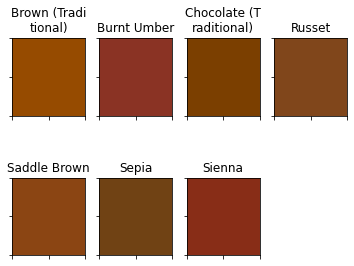

In [15]:
getCluster(1)

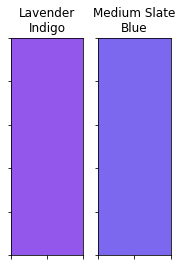

In [16]:
getCluster(2)

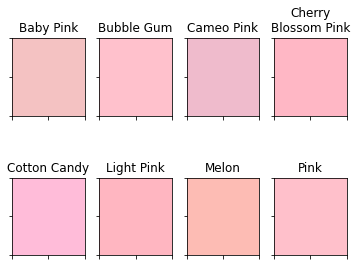

In [17]:
getCluster(3)

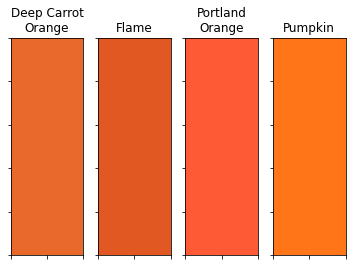

In [18]:
getCluster(4)

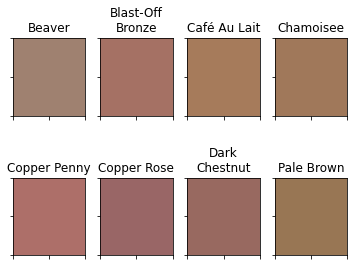

In [19]:
getCluster(6)

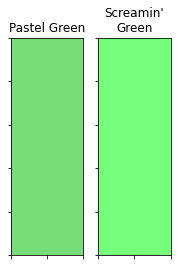

In [20]:
getCluster(7)

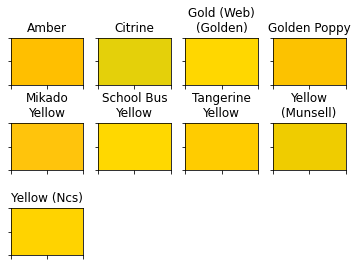

In [21]:
getCluster(8)

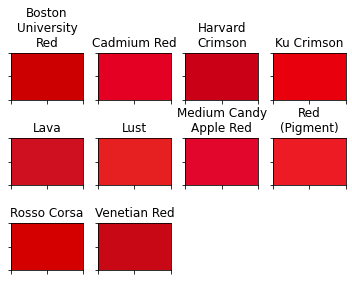

In [22]:
getCluster(9)

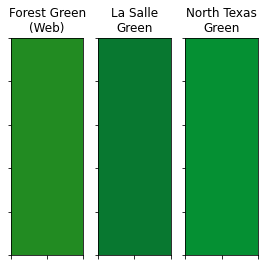

In [23]:
getCluster(10)

#### Checking a random cluster

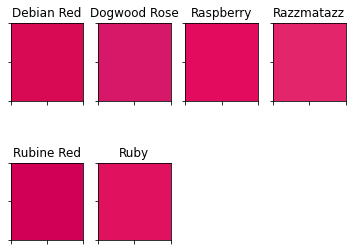

In [24]:
getCluster(75)

# COLOR DETECTION USING OPENCV

In [25]:
img_path = 'detect_color.jpg'
# To input from user use :
# img_path = input('Enter image path :')

#Reading the image with opencv
img = cv2.imread(img_path)

#declaring global variables
clicked = False
r = g = b = xpos = ypos = 0

In [26]:
#function to calculate minimum Manhattan distance from all colors and get the most matching color
def getColorName(R,G,B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R- int(csv.loc[i,"R"])) + abs(G- int(csv.loc[i,"G"]))+ abs(B- int(csv.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = csv.loc[i,"color_name"]
    return cname

In [27]:
#function to get x,y coordinates of mouse double click
def draw_function(event, x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b,g,r,xpos,ypos, clicked
        clicked = True
        xpos = x
        ypos = y
        b,g,r = img[y,x]
        b = int(b)
        g = int(g)
        r = int(r)

## Open new window to detect color from image

In [28]:
cv2.namedWindow('image')
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.setMouseCallback('image',draw_function)

while(1):

    cv2.imshow("image",img)
    if (clicked):
   
        #cv2.rectangle(image, startpoint, endpoint, color, thickness)-1 fills entire rectangle 
        cv2.rectangle(img,(20,20), (975,60), (b,g,r), -1)

        #Creating text string to display( Color name and RGB values )
        text = 'Predicted Color : ' + getColorName(r,g,b) + ' R='+ str(r) +  ' G='+ str(g) +  ' B='+ str(b)
        
        #cv2.putText(img,text,start,font(0-7),fontScale,color,thickness,lineType )
        cv2.putText(img, text,(50,50),2,0.9,(255,255,255),2,cv2.LINE_AA)

        #For very light colours we will display text in black colour
        if(r+g+b>=600):
            cv2.putText(img, text,(50,50),2,0.9,(0,0,0),2,cv2.LINE_AA)
            
        clicked=False

    #Exit the program when ESC key is pressed    
    if cv2.waitKey(20) & 0xFF ==27:
        break
    
cv2.destroyAllWindows()